# Machine Learning Homework 1

## Least Square Error

In [240]:
import numpy as np
import matplotlib.pyplot as plt

n = 3
l = 0

In [241]:
# preprocess input file

data_points = []
with open('test.txt', 'r') as f:
    for line in f.read().splitlines():
        x, y = line.split(',')
        data_points.append((float(x), float(y)))
data_points = np.array(data_points)
print(data_points)

[[-5.         51.76405235]
 [-4.79591837 45.42306433]
 [-4.59183673 41.2744481 ]
 [-3.97959184 26.6362165 ]
 [-3.57142857 20.25680606]
 [-2.95918367 11.61842924]
 [-2.75510204 10.45052507]
 [-1.73469388  1.84809823]
 [-1.32653061 -1.04053496]
 [-0.91836735 -4.6146308 ]
 [-0.71428571 -1.38719773]
 [-0.30612245 -1.9916444 ]
 [ 0.10204082 -0.91292461]
 [ 0.71428571  6.63482003]
 [ 1.12244898  9.54686746]
 [ 1.73469388 15.72016147]
 [ 1.93877551 20.62251684]
 [ 2.55102041 33.48059726]
 [ 2.95918367 40.76391966]
 [ 3.97959184 66.89976056]
 [ 4.3877551  78.44316466]
 [ 4.59183673 86.99156782]
 [ 5.         99.78725972]]


In [247]:
# get inverse of matrix

def inverse(matrix):
    size = matrix.shape[0]
    
    # LU decomposition
    U = np.copy(matrix)
    L = np.identity(size)
    
    for i in range(size):
        for j in range(i+1, size):
            rate = U[j][i]/U[i][i]
            U[j] = U[j] - U[i]*rate
            L[j][i] = rate
    
    # calculate inverse of matrix
    I = np.identity(size)
    D = np.zeros((size, size))
    for i in range(size):
        d = np.zeros(size)
        d[0] = I[i, 0]
        for j in range(1, size):
            d[j] = I[i, j] - L[j,:j].dot(d[:j])
        D[:, i] = d
    inv = np.zeros((size, size))
    for i in range(size):
        v = np.zeros(size)
        v[size-1] = D[size-1, i]/U[size-1, size-1]
        for j in range(size-2, -1, -1):
            v[j] = (D[j, i] - U[j, j+1:].dot(v[j+1:]))/U[j, j]
        inv[:, i] = v
    
    return inv

In [250]:
# perform LSE

A = np.ones((data_points.shape[0], n))
for i in range(1, n):
    A[:, n-i-1] = data_points[:, 0]**i
b = data_points[:, 1]    

v = inverse(A.transpose().dot(A) + l*np.identity(A.shape[1])).dot(A.transpose()).dot(b)
print(v)

[ 3.02385339  4.90619026 -0.23140176]


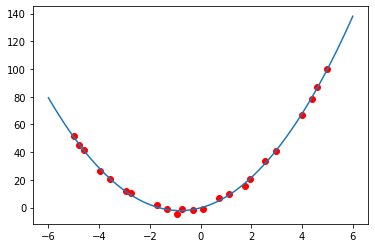

In [255]:
# visualize the result

M = np.max(data_points[:, 0])
m = np.min(data_points[:, 0])
left = m - (M-m)*0.1
right = M + (M-m)*0.1

x = np.linspace(left, right, data_points.shape[0]*10)
_x = np.ones((x.size, n))
for i in range(1, n):
    _x[:, n-i-1] = x**i
y = _x.dot(v)

plt.plot(data_points[:, 0], data_points[:, 1], 'ro')
plt.plot(x, y)
plt.show()

## Newton's Method